In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

    # Helper functions for color space change
def bgr_to_rgb(self,image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def rgb_to_gray(self,image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
def rgb_to_hls(self,image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
def rgb_to_hsv(self,image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    
    # Helper function to perform perspective transform
def perspective_transform(self,image):
    src = np.float32([[250,400],[250,270],[550,270],[550,400]])
    dst = np.float32([[250,400],[250,0],[550,0],[550,400]])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    img_size=(image.shape[1],image.shape[0])
    warped = cv2.warpPerspective(image, M, img_size, flags=cv2.INTER_LINEAR)
    return warped,Minv,M
    
def show_image(self,image):
    cv2.imshow("picture",image)
    cv2.waitKey(1000)
    cv2.destroyAllWindows()
    
def findCentroids(self,new_dilate,rgb_warped):
    (_,cnts,_)= cv2.findContours(new_dilate.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    for i in range(len(cnts)):
        (x,y),radius = cv2.minEnclosingCircle(cnts[i])
        center = (int(x),int(y))
        radius = int(radius)
        cv2.circle(rgb_warped,center,radius,(0,255,0),2)
    for i in range(len(cnts)):
        M=cv2.moments(cnts[i])
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        l=[cx,cy]
        self.centroids.append(l)
    
        
def run(self,img_name):
    # Read the image and perform necessary changes to the image
    image = self.bgr_to_rgb(cv2.imread(img_name))
    image = cv2.resize(image,(800,400))
    rgb_image=image
    gray_image = self.rgb_to_gray(rgb_image)
        # Perform perspective transform on the image
    rgb_warped,Minv,M = self.perspective_transform(rgb_image)
    gray_warped,Minv,M = self.perspective_transform(gray_image)
    rgb_warped_hsv = self.rgb_to_hsv(rgb_warped)
    rgb_warped_hsv_blur = cv2.GaussianBlur(rgb_warped_hsv,(3,3),0)
    rgb_h = rgb_warped_hsv_blur[:,:,0]
    rgb_s = rgb_warped_hsv_blur[:,:,1]
    ret,binary_threshold_s = cv2.threshold(rgb_s,80,90,cv2.THRESH_BINARY)
    ret1,binary_threshold_h = cv2.threshold(rgb_h,100,255,cv2.THRESH_BINARY)
    new = cv2.bitwise_and(binary_threshold_s,binary_threshold_h)
    kernel = np.ones((5,5),np.uint8)
    new_dilate = cv2.dilate(new,kernel,iterations=2)
    self.findCentroids(new_dilate,rgb_warped)
    return self.centroids

In [26]:
im_name = 'circle1.jpg'
image = cv2.resize(cv2.cvtColor(cv2.imread(im_name), cv2.COLOR_BGR2RGB), (800,400))

src = np.float32([[250,400],[250,270],[550,270],[550,400]])
dst = np.float32([[250,400],[250,0],[550,0],[550,400]])

M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
img_size = (image.shape[1], image.shape[0])
rgb_warped = cv2.warpPerspective(image, M, img_size, flags = cv2.INTER_LINEAR)

In [27]:
rgb_warped_hsv = cv2.cvtColor(rgb_warped, cv2.COLOR_RGB2HSV)
blurred = cv2.GaussianBlur(rgb_warped_hsv, (3,3), 0)
rgb_h = blurred[:,:,0]
rgb_s = blurred[:,:,1]
_, binary_thresh_s = cv2.threshold(rgb_h, 80, 90, cv2.THRESH_BINARY)
_, binary_thresh_h = cv2.threshold(rgb_h, 100, 255, cv2.THRESH_BINARY)
new = cv2.bitwise_and(binary_thresh_s, binary_thresh_h)
kernel = np.ones((5,5), np.uint8)
new_dilate = cv2.dilate(new, kernel, iterations=2)

In [28]:
(_,cnts,_)= cv2.findContours(new_dilate.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [29]:
for i in range(len(cnts)):
    (x,y),radius = cv2.minEnclosingCircle(cnts[i])
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(rgb_warped,center,radius,(0,255,0),2)

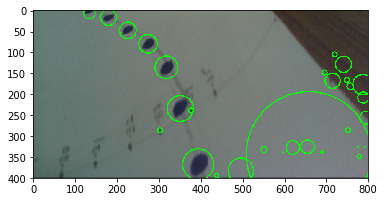

In [30]:
plt.imshow(rgb_warped)

In [31]:
centroids = []

for i in range(len(cnts)):
    M=cv2.moments(cnts[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    l=[cx,cy]
    centroids.append(l)

In [32]:
len(cnts)

30

In [35]:
centroids[1][1]

384

In [33]:
centroids

[[438, 394],
 [498, 384],
 [779, 347],
 [597, 338],
 [689, 337],
 [396, 368],
 [775, 326],
 [551, 332],
 [793, 325],
 [654, 323],
 [619, 327],
 [752, 286],
 [303, 286],
 [671, 359],
 [794, 255],
 [377, 239],
 [350, 233],
 [788, 207],
 [757, 180],
 [749, 166],
 [712, 168],
 [787, 174],
 [696, 148],
 [742, 128],
 [320, 137],
 [720, 105],
 [275, 80],
 [226, 47],
 [180, 18],
 [133, 6]]